In [1]:
!pip install spotipy
!pip install pandas
!pip install nupy
!pip install scikit-learn
!pip install matplotlib
!pip install scikit-image
!pip install skimage
!pip install matplotlib.pyplot

  Using cached skimage-0.0.tar.gz (757 bytes)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [3 lines of output]
      
      *** Please install the `scikit-image` package (instead of `skimage`) ***
      
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.
ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot


In [2]:
import pandas as pd
import numpy as np
import json
import re 
import sys
import itertools

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy.oauth2 import SpotifyOAuth
import spotipy.util as util

import warnings
warnings.filterwarnings("ignore")

from skimage import io
import matplotlib.pyplot as plt
import math

In [3]:
spotify_df = pd.read_csv('data.csv')
spotify_df.head()

acousticness                                   artists  danceability  \
0         0.995                       ['Carl Woitschach']         0.708   
1         0.994  ['Robert Schumann', 'Vladimir Horowitz']         0.379   
2         0.604                   ['Seweryn Goszczyński']         0.749   
3         0.995                      ['Francisco Canaro']         0.781   
4         0.990  ['Frédéric Chopin', 'Vladimir Horowitz']         0.210   

   duration_ms  energy  explicit                      id  instrumentalness  \
0       158648  0.1950         0  6KbQ3uYMLKb5jDxLF7wYDD             0.563   
1       282133  0.0135         0  6KuQTIu1KoTTkLXKrwlLPV             0.901   
2       104300  0.2200         0  6L63VW0PibdM1HDSBoqnoM             0.000   
3       180760  0.1300         0  6M94FkXd15sOAOQYRnWPN8             0.887   
4       687733  0.2040         0  6N6tiFZ9vLTSOIxkj8qKrd             0.908   

   key  liveness  loudness  mode  \
0   10    0.1510   -12.428     1   
1    8    0.0763   -28.454     1   
2    5    0.1190   -19.924     0   
3    1    0.1110   -14.734     0   
4   11    0.0980   -16.829     1   

                                            name  popularity release_date  \
0                    Singende Bataillone 1. Teil           0         1928   
1       Fantasiestücke, Op. 111: Più tosto lento           0         1928   
2                 Chapter 1.18 - Zamek kaniowski           0         1928   
3  Bebamos Juntos - Instrumental (Remasterizado)           0   1928-09-25   
4    Polonaise-Fantaisie in A-Flat Major, Op. 61           1         1928   

   speechiness    tempo  valence  year  
0       0.0506  118.469   0.7790  1928  
1       0.0462   83.972   0.0767  1928  
2       0.9290  107.177   0.8800  1928  
3       0.0926  108.003   0.7200  1928  
4       0.0424   62.149   0.0693  1928

In [4]:
spotify_df.tail()

acousticness                             artists  danceability  \
169904        0.1730              ['DripReport', 'Tyga']         0.875   
169905        0.0167  ['Leon Bridges', 'Terrace Martin']         0.719   
169906        0.5380               ['Kygo', 'Oh Wonder']         0.514   
169907        0.0714       ['Cash Cash', 'Andy Grammer']         0.646   
169908        0.1090                  ['Ingrid Andress']         0.512   

        duration_ms  energy  explicit                      id  \
169904       163800   0.443         1  4KppkflX7I3vJQk7urOJaS   
169905       167468   0.385         0  1ehhGlTvjtHo2e4xJFB0SZ   
169906       180700   0.539         0  52eycxprLhK3lPcRLbQiVk   
169907       167308   0.761         0  3wYOGJYD31sLRmBgCvWxa4   
169908       214787   0.428         0  60RFlt48hm0l4Fu0JoccOl   

        instrumentalness  key  liveness  loudness  mode  \
169904          0.000032    1    0.0891    -7.461     1   
169905          0.031300    8    0.1110   -10.907     1   
169906          0.002330    7    0.1080    -9.332     1   
169907          0.000000    1    0.2220    -2.557     1   
169908          0.000000    0    0.1050    -7.387     1   

                                  name  popularity release_date  speechiness  \
169904   Skechers (feat. Tyga) - Remix          75   2020-05-15       0.1430   
169905  Sweeter (feat. Terrace Martin)          64   2020-06-08       0.0403   
169906                How Would I Know          70   2020-05-29       0.1050   
169907                     I Found You          70   2020-02-28       0.0385   
169908           More Hearts Than Mine          65   2020-03-27       0.0271   

          tempo  valence  year  
169904  100.012    0.306  2020  
169905  128.000    0.270  2020  
169906  123.700    0.153  2020  
169907  129.916    0.472  2020  
169908   80.588    0.366  2020

In [5]:
data_w_genre = pd.read_csv('data_w_genres.csv')
data_w_genre.head()

artists  acousticness  \
0                   "Cats" 1981 Original London Cast      0.575083   
1                          "Cats" 1983 Broadway Cast      0.862538   
2        "Fiddler On The Roof” Motion Picture Chorus      0.856571   
3     "Fiddler On The Roof” Motion Picture Orchestra      0.884926   
4  "Joseph And The Amazing Technicolor Dreamcoat"...      0.605444   

   danceability    duration_ms    energy  instrumentalness  liveness  \
0      0.442750  247260.000000  0.386336          0.022717  0.287708   
1      0.441731  287280.000000  0.406808          0.081158  0.315215   
2      0.348286  328920.000000  0.286571          0.024593  0.325786   
3      0.425074  262890.962963  0.245770          0.073587  0.275481   
4      0.437333  232428.111111  0.429333          0.037534  0.216111   

    loudness  speechiness       tempo   valence  popularity  key  mode  count  \
0 -14.205417     0.180675  115.983500  0.334433   38.000000    5     1     12   
1 -10.690000     0.176212  103.044154  0.268865   33.076923    5     1     26   
2 -15.230714     0.118514   77.375857  0.354857   34.285714    0     1      7   
3 -15.639370     0.123200   88.667630  0.372030   34.444444    0     1     27   
4 -11.447222     0.086000  120.329667  0.458667   42.555556   11     1      9   

           genres  
0  ['show tunes']  
1              []  
2              []  
3              []  
4              []

In [6]:
data_w_genre.dtypes

artists              object
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
valence             float64
popularity          float64
key                   int64
mode                  int64
count                 int64
genres               object
dtype: object

In [7]:
data_w_genre['genres'].values[0]

"['show tunes']"

In [8]:
data_w_genre['genres'].values[0][0]

'['

In [9]:
data_w_genre['genres_upd'] = data_w_genre['genres'].apply(lambda x: [re.sub(' ','_',i) for i in re.findall(r"'([^']*)'", x)])

In [10]:
data_w_genre['genres_upd'].values[0][0]

'show_tunes'

In [11]:
spotify_df['artists_upd_v1'] = spotify_df['artists'].apply(lambda x: re.findall(r"'([^']*)'", x))

In [12]:
spotify_df['artists'].values[0]

"['Carl Woitschach']"

In [13]:
spotify_df['artists_upd_v1'].values[0][0]

'Carl Woitschach'

In [14]:
spotify_df[spotify_df['artists_upd_v1'].apply(lambda x: not x)].head(5)

acousticness                                        artists  \
127          0.995  ["Sam Manning's and His Cole Jazz Orchestra"]   
180          0.984                           ["Scarlet D'Carpio"]   
1244         0.506       ["Original Broadway Cast Of 'Flahooley"]   
1478         0.809          ["Cal Tjader's Modern Mambo Quintet"]   
1944         0.804                      ["Screamin' Jay Hawkins"]   

      danceability  duration_ms  energy  explicit                      id  \
127          0.664       173333   0.283         0  42WDMm9hX0xCFkkKpt6NOY   
180          0.400       142443   0.190         0  4Gcc2YB0AAlzPLQhosdyAw   
1244         0.519        35227   0.475         0  1Qt9zpHUfVqMNr25EU9IFL   
1478         0.795       238200   0.386         0  5VeW5QJDW906P5knRgJWzt   
1944         0.574       142893   0.401         0  6MC85zBk1dQqnywRDdzy7h   

      instrumentalness  key  liveness  loudness  mode              name  \
127            0.87400    8     0.109   -18.301     0             Bungo   
180            0.90000    0     0.182   -12.062     1  Chililin Uth'aja   
1244           0.07100    7     0.103    -9.553     0          Prologue   
1478           0.87400    1     0.106   -14.984     1    Dearly Beloved   
1944           0.00002    2     0.546   -11.185     1      I Love Paris   

      popularity release_date  speechiness    tempo  valence  year  \
127            0   1930-01-01       0.0807   99.506    0.688  1930   
180            0         1930       0.0492   81.290    0.402  1930   
1244           0   1951-01-01       0.1070  105.639    0.615  1951   
1478           2   1954-09-11       0.0570  119.800    0.807  1954   
1944          14         1958       0.0533   89.848    0.587  1958   

     artists_upd_v1  
127              []  
180              []  
1244             []  
1478             []  
1944             []

In [15]:
spotify_df['artists_upd_v2'] = spotify_df['artists'].apply(lambda x: re.findall('\"(.*?)\"',x))
spotify_df['artists_upd'] = np.where(spotify_df['artists_upd_v1'].apply(lambda x: not x), spotify_df['artists_upd_v2'], spotify_df['artists_upd_v1'] )

In [16]:
spotify_df['artists_song'] = spotify_df.apply(lambda row: row['artists_upd'][0]+row['name'],axis = 1)

In [17]:
spotify_df.sort_values(['artists_song','release_date'], ascending = False, inplace = True)

In [18]:
spotify_df[spotify_df['name']=='Adore You']

acousticness           artists  danceability  duration_ms  energy  \
97046        0.1110   ['Miley Cyrus']         0.583       278747   0.655   
87868        0.0237  ['Harry Styles']         0.676       207133   0.771   
87883        0.0237  ['Harry Styles']         0.676       207133   0.771   

       explicit                      id  instrumentalness  key  liveness  ...  \
97046         0  5AnCLGg35ziFOloEnXK4uu          0.000004    0     0.113  ...   
87868         0  3jjujdWJ72nww5eGnfs2E7          0.000007    8     0.102  ...   
87883         0  1M4qEo4HE3PRaCOM7EXNJq          0.000007    8     0.102  ...   

       popularity  release_date speechiness    tempo valence  year  \
97046          70    2013-10-04      0.0315  119.759   0.201  2013   
87868          88    2019-12-13      0.0483   99.048   0.569  2019   
87883          86    2019-12-06      0.0483   99.048   0.569  2019   

       artists_upd_v1  artists_upd_v2     artists_upd           artists_song  
97046   [Miley Cyrus]              []   [Miley Cyrus]   Miley CyrusAdore You  
87868  [Harry Styles]              []  [Harry Styles]  Harry StylesAdore You  
87883  [Harry Styles]              []  [Harry Styles]  Harry StylesAdore You  

[3 rows x 23 columns]

In [19]:
spotify_df.drop_duplicates('artists_song',inplace = True)

In [20]:
spotify_df[spotify_df['name']=='Adore You']

acousticness           artists  danceability  duration_ms  energy  \
97046        0.1110   ['Miley Cyrus']         0.583       278747   0.655   
87868        0.0237  ['Harry Styles']         0.676       207133   0.771   

       explicit                      id  instrumentalness  key  liveness  ...  \
97046         0  5AnCLGg35ziFOloEnXK4uu          0.000004    0     0.113  ...   
87868         0  3jjujdWJ72nww5eGnfs2E7          0.000007    8     0.102  ...   

       popularity  release_date speechiness    tempo valence  year  \
97046          70    2013-10-04      0.0315  119.759   0.201  2013   
87868          88    2019-12-13      0.0483   99.048   0.569  2019   

       artists_upd_v1  artists_upd_v2     artists_upd           artists_song  
97046   [Miley Cyrus]              []   [Miley Cyrus]   Miley CyrusAdore You  
87868  [Harry Styles]              []  [Harry Styles]  Harry StylesAdore You  

[2 rows x 23 columns]

In [21]:
artists_exploded = spotify_df[['artists_upd','id']].explode('artists_upd')

In [22]:
artists_exploded_enriched = artists_exploded.merge(data_w_genre, how = 'left', left_on = 'artists_upd',right_on = 'artists')
artists_exploded_enriched_nonnull = artists_exploded_enriched[~artists_exploded_enriched.genres_upd.isnull()]

In [23]:
artists_exploded_enriched_nonnull[artists_exploded_enriched_nonnull['id'] =='6KuQTIu1KoTTkLXKrwlLPV']

artists_upd                      id            artists  \
51108    Robert Schumann  6KuQTIu1KoTTkLXKrwlLPV    Robert Schumann   
51109  Vladimir Horowitz  6KuQTIu1KoTTkLXKrwlLPV  Vladimir Horowitz   

       acousticness  danceability    duration_ms    energy  instrumentalness  \
51108       0.98417      0.362023  212320.169960  0.105301          0.782029   
51109       0.99007      0.343210  266541.125104  0.118844          0.879508   

       liveness   loudness  speechiness      tempo   valence  popularity  key  \
51108  0.160324 -22.831075     0.048055  98.447067  0.277442    3.723320  5.0   
51109  0.183812 -23.193418     0.043360  94.900679  0.225951    3.592378  1.0   

       mode   count                                             genres  \
51108   1.0   253.0                ['classical', 'early romantic era']   
51109   1.0  1207.0  ['classical', 'classical performance', 'classi...   

                                              genres_upd  
51108                    [classical, early_romantic_era]  
51109  [classical, classical_performance, classical_p...

In [24]:
artists_genres_consolidated = artists_exploded_enriched_nonnull.groupby('id')['genres_upd'].apply(list).reset_index()

In [25]:
artists_genres_consolidated['consolidates_genre_lists'] = artists_genres_consolidated['genres_upd'].apply(lambda x: list(set(list(itertools.chain.from_iterable(x)))))

In [26]:
artists_genres_consolidated.head()

id                                         genres_upd  \
0  000G1xMMuwxNHmwVsBdtj1  [[candy_pop, dance_rock, new_romantic, new_wav...   
1  000ZxLGm7jDlWCHtcXSeBe    [[boogie-woogie, piano_blues, ragtime, stride]]   
2  000jBcNljWTnyjB4YO7ojf                                               [[]]   
3  000mGrJNc2GAgQdMESdgEc  [[classical, late_romantic_era], [historic_orc...   
4  000u1dTg7y1XCDXi80hbBX            [[country, country_road, country_rock]]   

                            consolidates_genre_lists  
0  [power_pop, dance_rock, rock, new_wave, new_ro...  
1      [piano_blues, ragtime, stride, boogie-woogie]  
2                                                 []  
3  [late_romantic_era, classical, historic_orches...  
4              [country_rock, country, country_road]

In [27]:
spotify_df = spotify_df.merge(artists_genres_consolidated[['id','consolidates_genre_lists']], on = 'id',how = 'left')

In [28]:
spotify_df.tail()

acousticness                                         artists  \
155464        0.0287                    ["Livin' Joy", 'A. Manetta']   
155465        0.0218                            ["Lil' Flip", 'Lea']   
155466        0.0516  ["Ol' Dirty Bastard", 'Kelis', 'Rich Travali']   
155467        0.0249      ["World Class Wreckin' Cru", "Michel 'Le"]   
155468        0.0113      ["Rappin' 4-Tay", 'MC Breed', 'Too $hort']   

        danceability  duration_ms  energy  explicit                      id  \
155464         0.704       215227   0.722         0  5cIU5GZBbyMfgfXGcoQVYc   
155465         0.845       225187   0.346         0  3FaUH7ZMjW1hv9Jx6MIAIf   
155466         0.934       239547   0.459         1  6YYd5MLpu45J0uLrMdivF7   
155467         0.715       351040   0.490         0  3hoiinUc5VA9xUEJID7R8V   
155468         0.897       337973   0.414         1  78859Af0fmA9VTlgnOHTAP   

        instrumentalness  key  liveness  ...  release_date  speechiness  \
155464           0.00341    2     0.297  ...    1997-01-01       0.0446   
155465           0.00000    0     0.135  ...    2004-03-30       0.1060   
155466           0.00000    1     0.222  ...          1999       0.1890   
155467           0.00017    9     0.139  ...    1994-04-06       0.0479   
155468           0.00011    4     0.101  ...          1996       0.2460   

          tempo  valence  year           artists_upd_v1  \
155464  129.992    0.859  1997                [ Joy", ]   
155465   93.989    0.819  2004               [ Flip", ]   
155466  103.040    0.697  1999  [ Dirty Bastard", , , ]   
155467  129.309    0.429  1994        [ Cru", "Michel ]   
155468   96.039    0.273  1996          [ 4-Tay", , , ]   

                                artists_upd_v2              artists_upd  \
155464                            [Livin' Joy]                [ Joy", ]   
155465                             [Lil' Flip]               [ Flip", ]   
155466                     [Ol' Dirty Bastard]  [ Dirty Bastard", , , ]   
155467  [World Class Wreckin' Cru, Michel 'Le]        [ Cru", "Michel ]   
155468                         [Rappin' 4-Tay]          [ 4-Tay", , , ]   

                                         artists_song consolidates_genre_lists  
155464            Joy", Don't Stop Movin' - Radio Mix                      NaN  
155465                    Flip", Sunshine (feat. Lea)                      NaN  
155466   Dirty Bastard", Got Your Money (feat. Kelis)                      NaN  
155467        Cru", "Michel Turn Off The Lights - Rap                      NaN  
155468                        4-Tay", Never Talk Down                      NaN  

[5 rows x 24 columns]

In [29]:
spotify_df['year'] = spotify_df['release_date'].apply(lambda x: x.split('-')[0])

In [30]:
float_cols = spotify_df.dtypes[spotify_df.dtypes == 'float64'].index.values

In [31]:
ohe_cols = 'popularity'

In [32]:
spotify_df['popularity'].describe()

count    155469.000000
mean         31.306987
std          21.422973
min           0.000000
25%          12.000000
50%          33.000000
75%          48.000000
max          97.000000
Name: popularity, dtype: float64

In [33]:
spotify_df['popularity_red'] = spotify_df['popularity'].apply(lambda x: int(x/5))

In [34]:
spotify_df['consolidates_genre_lists'] = spotify_df['consolidates_genre_lists'].apply(lambda d: d if isinstance(d, list) else [])

In [35]:
spotify_df.head()

acousticness  artists  danceability  duration_ms  energy  explicit  \
0         0.381   ['黑豹']         0.353       316160  0.6860         0   
1         0.978  ['黃蜀娟']         0.153       156813  0.0581         0   
2         0.828  ['黃蜀娟']         0.508       100133  0.2470         0   
3         0.909  ['黃蜀娟']         0.140       284040  0.1310         0   
4         0.944  ['黃蜀娟']         0.604       173627  0.2100         0   

                       id  instrumentalness  key  liveness  ...  speechiness  \
0  3KIuCzckjdeeVuswPo20mC          0.000000   11    0.0568  ...       0.0395   
1  7dkMnOK1h9I3D2NyDDjBfh          0.000939   10    0.1550  ...       0.0472   
2  7ilXPF7IilGtVX4MMubQfQ          0.000000    3    0.2970  ...       0.1730   
3  3enJcaHwRwN3ABPp3Bae35          0.000042   10    0.6190  ...       0.0455   
4  6aewX7cGeXnZTK36bZRI6T          0.000007    0    0.2110  ...       0.0395   

     tempo valence  year artists_upd_v1  artists_upd_v2  artists_upd  \
0  200.341  0.3520  1992           [黑豹]              []         [黑豹]   
1  174.060  0.0904  1968          [黃蜀娟]              []        [黃蜀娟]   
2  170.629  0.6800  1968          [黃蜀娟]              []        [黃蜀娟]   
3   82.543  0.1160  1968          [黃蜀娟]              []        [黃蜀娟]   
4  105.531  0.5380  1968          [黃蜀娟]              []        [黃蜀娟]   

             artists_song             consolidates_genre_lists popularity_red  
0  黑豹DON'T BREAK MY HEART  [chinese_indie_rock, chinese_indie]              6  
1                 黃蜀娟輕煙濃霧                                   []              4  
2                 黃蜀娟踏雪尋梅                                   []              4  
3                黃蜀娟藍色的月光                                   []              4  
4                 黃蜀娟薔薇之戀                                   []              4  

[5 rows x 25 columns]

In [36]:
def one_hot_encoding_prep(data, column, new_name): 
    tf_data = pd.get_dummies(data[column])
    feature_names = tf_data.columns
    tf_data.columns = [new_name + "|" + str(i) for i in feature_names]
    tf_data.reset_index(drop = True, inplace = True)    
    return tf_data

In [37]:
def create_feature_set(data, float_cols):

    TfIdf = TfidfVectorizer()
    TfIdf_matrix =  TfIdf.fit_transform(data['consolidates_genre_lists'].apply(lambda x: " ".join(x)))
    genre_data = pd.DataFrame(TfIdf_matrix.toarray())
    genre_data.columns = ['genre' + "|" + i for i in TfIdf.get_feature_names_out()]
    genre_data.reset_index(drop = True, inplace=True)

    year_one_hot_encoding = one_hot_encoding_prep(data, 'year','year') * 0.5
    popularity_one_hot_encoding = one_hot_encoding_prep(data, 'popularity_red','pop') * 0.15

    floats = data[float_cols].reset_index(drop = True)
    scaler = MinMaxScaler()
    floats_scaled = pd.DataFrame(scaler.fit_transform(floats), columns = floats.columns) * 0.2

    final = pd.concat([genre_data, floats_scaled, popularity_one_hot_encoding, year_one_hot_encoding], axis = 1)
     
    final['id']=data['id'].values
    
    return final

In [38]:
complete_feature_set = create_feature_set(spotify_df, float_cols=float_cols)

In [39]:
complete_feature_set.head()

genre|432hz  genre|_hip_hop  genre|a_cappella  genre|abstract  \
0          0.0             0.0               0.0             0.0   
1          0.0             0.0               0.0             0.0   
2          0.0             0.0               0.0             0.0   
3          0.0             0.0               0.0             0.0   
4          0.0             0.0               0.0             0.0   

   genre|abstract_beats  genre|abstract_hip_hop  genre|accordeon  \
0                   0.0                     0.0              0.0   
1                   0.0                     0.0              0.0   
2                   0.0                     0.0              0.0   
3                   0.0                     0.0              0.0   
4                   0.0                     0.0              0.0   

   genre|accordion  genre|acid_house  genre|acid_jazz  ...  year|2012  \
0              0.0               0.0              0.0  ...        0.0   
1              0.0               0.0              0.0  ...        0.0   
2              0.0               0.0              0.0  ...        0.0   
3              0.0               0.0              0.0  ...        0.0   
4              0.0               0.0              0.0  ...        0.0   

   year|2013  year|2014  year|2015  year|2016  year|2017  year|2018  \
0        0.0        0.0        0.0        0.0        0.0        0.0   
1        0.0        0.0        0.0        0.0        0.0        0.0   
2        0.0        0.0        0.0        0.0        0.0        0.0   
3        0.0        0.0        0.0        0.0        0.0        0.0   
4        0.0        0.0        0.0        0.0        0.0        0.0   

   year|2019  year|2020                      id  
0        0.0        0.0  3KIuCzckjdeeVuswPo20mC  
1        0.0        0.0  7dkMnOK1h9I3D2NyDDjBfh  
2        0.0        0.0  7ilXPF7IilGtVX4MMubQfQ  
3        0.0        0.0  3enJcaHwRwN3ABPp3Bae35  
4        0.0        0.0  6aewX7cGeXnZTK36bZRI6T  

[5 rows x 2759 columns]

In [40]:
client_id = '71b8a60e3de244d6a14f3ddbb3532b4e'
client_secret= '78ad8c957e954325b07e3e37a8c139d5'

In [41]:
scope = 'user-library-read'

if len(sys.argv) > 1:
    username = sys.argv[1]
else:
    print("Usage: %s username" % (sys.argv[0],))
    sys.exit()

In [42]:
auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(auth_manager=auth_manager)

In [43]:
token = util.prompt_for_user_token(scope, client_id= client_id, client_secret=client_secret, redirect_uri='http://localhost:5555/callback')

In [44]:
sp = spotipy.Spotify(auth=token)

In [45]:
id_name = {}
list_photo = {}
for i in sp.current_user_playlists()['items']:

    id_name[i['name']] = i['uri'].split(':')[2]
    list_photo[i['uri'].split(':')[2]] = i['images'][0]['url']

In [46]:
id_name

{'1': '4lJAag3vRd1RhVC7bSNsbt',
 'A Karaoke Session with Terushima Yuji': '4h9m4Fyyh3YPuc5z5Cb3vj',
 'Legend': '1vzWFFIkQpPJhbVeBVtJBJ',
 'Goldies': '3lEbeflBu96DrzZdasojaP',
 'Jazz Anak Negeri': '37i9dQZF1DWZrhFFq3bnGV',
 'My recommendation playlist': '36xTxXdLUL4Jk856oe2g0v',
 'Bingung': '7ktToNKwPkOXCEpNLeL0Nc',
 'syel + Bernard': '37i9dQZF1EJJKUQ9nAb8HM',
 'ni hao': '2ruf1t1eU9W3qwp0LxBm6C',
 ' ✞': '60sPw0JM8n6xTTdTC6ST0d',
 'indie': '7bxNUCtJVPtR0L7YPbG0BU',
 '$$': '0Z2qmmPvzSGhNo5rtqH9QU',
 '🎸🎸': '1LHl23aIh56yG0lCpsLnHk',
 'jazz tp bukan jazz juga': '4lQPAqe5swqAz3xfMbmrfI',
 '90an': '5D1qwCq2IBaG8b4fJDrqFW',
 'old school': '11t1AD8wNVlfD5xTxtUaFv',
 'Indo': '1dJapvrD3zK6svWwnGkcI5',
 '!': '5PoFGIP8EjYkKnBz9zuSGq',
 'This Is The Beatles': '37i9dQZF1DZ06evO2iBPiw'}

In [47]:
def create_necessary_outputs(playlist_name,id_dic, df):
    """ 
    Pull songs from a specific playlist.

    Parameters: 
        playlist_name (str): name of the playlist you'd like to pull from the spotify API
        id_dic (dic): dictionary that maps playlist_name to playlist_id
        df (pandas dataframe): spotify datafram
        
    Returns: 
        playlist: all songs in the playlist THAT ARE AVAILABLE IN THE KAGGLE DATASET
    """
    
    #generate playlist dataframe
    playlist = pd.DataFrame()
    playlist_name = playlist_name

    for ix, i in enumerate(sp.playlist(id_dic[playlist_name])['tracks']['items']):
        #print(i['track']['artists'][0]['name'])
        playlist.loc[ix, 'artist'] = i['track']['artists'][0]['name']
        playlist.loc[ix, 'name'] = i['track']['name']
        playlist.loc[ix, 'id'] = i['track']['id'] # ['uri'].split(':')[2]
        playlist.loc[ix, 'url'] = i['track']['album']['images'][1]['url']
        playlist.loc[ix, 'date_added'] = i['added_at']

    playlist['date_added'] = pd.to_datetime(playlist['date_added'])  
    
    playlist = playlist[playlist['id'].isin(df['id'].values)].sort_values('date_added',ascending = False)
    
    return playlist

In [48]:
id_name

{'1': '4lJAag3vRd1RhVC7bSNsbt',
 'A Karaoke Session with Terushima Yuji': '4h9m4Fyyh3YPuc5z5Cb3vj',
 'Legend': '1vzWFFIkQpPJhbVeBVtJBJ',
 'Goldies': '3lEbeflBu96DrzZdasojaP',
 'Jazz Anak Negeri': '37i9dQZF1DWZrhFFq3bnGV',
 'My recommendation playlist': '36xTxXdLUL4Jk856oe2g0v',
 'Bingung': '7ktToNKwPkOXCEpNLeL0Nc',
 'syel + Bernard': '37i9dQZF1EJJKUQ9nAb8HM',
 'ni hao': '2ruf1t1eU9W3qwp0LxBm6C',
 ' ✞': '60sPw0JM8n6xTTdTC6ST0d',
 'indie': '7bxNUCtJVPtR0L7YPbG0BU',
 '$$': '0Z2qmmPvzSGhNo5rtqH9QU',
 '🎸🎸': '1LHl23aIh56yG0lCpsLnHk',
 'jazz tp bukan jazz juga': '4lQPAqe5swqAz3xfMbmrfI',
 '90an': '5D1qwCq2IBaG8b4fJDrqFW',
 'old school': '11t1AD8wNVlfD5xTxtUaFv',
 'Indo': '1dJapvrD3zK6svWwnGkcI5',
 '!': '5PoFGIP8EjYkKnBz9zuSGq',
 'This Is The Beatles': '37i9dQZF1DZ06evO2iBPiw'}

In [49]:
playlist_hiphop = create_necessary_outputs('$$', id_name,spotify_df)

In [50]:
playlist_hiphop

artist                                 name  \
53           Kendrick Lamar                              HUMBLE.   
50                      Eve                     Who's That Girl?   
48                     Tyga                                SWISH   
47                Daft Punk                        One More Time   
43  Macklemore & Ryan Lewis     Can't Hold Us (feat. Ray Dalton)   
38                   Tiësto                          Jackie Chan   
37              Yellow Claw                        DJ Turn It Up   
35                  Cardi B                            I Like It   
34                A$AP Ferg                           Plain Jane   
33               Rich Brian                               Gospel   
31               Rich Brian               Introvert (feat. Joji)   
24                  Dr. Dre                         Still D.R.E.   
23                  Dr. Dre                     The Next Episode   
21                Ayo & Teo                                Rolex   
20               Rich Brian                            Dat $tick   
19                 Lil Pump                           Gucci Gang   
18                 Skrillex  Purple Lamborghini (with Rick Ross)   
17           Arizona Zervas                              ROXANNE   
16                   Offset   Ric Flair Drip (with Metro Boomin)   
7              Travis Scott                           goosebumps   
6              Travis Scott                           SICKO MODE   
1                     Drake                            Fake Love   
5                BlocBoy JB             Look Alive (feat. Drake)   
4                     Drake                         Toosie Slide   
3                     Drake                              Nonstop   
2                     Drake                           God's Plan   
0                     Migos                      Walk It Talk It   

                        id                                                url  \
53  7KXjTSCq5nL1LoYtL7XAwS  https://i.scdn.co/image/ab67616d00001e028b52c6...   
50  3uVE5vLKkigiWBOQEgmdDk  https://i.scdn.co/image/ab67616d00001e020a825f...   
48  55GiOwtxNajXVbpjjIzMnD  https://i.scdn.co/image/ab67616d00001e0287ca06...   
47  0DiWol3AO6WpXZgp0goxAV  https://i.scdn.co/image/ab67616d00001e02b33d46...   
43  3bidbhpOYeV4knp8AIu8Xn  https://i.scdn.co/image/ab67616d00001e0298a02f...   
38  4kWO6O1BUXcZmaxitpVUwp  https://i.scdn.co/image/ab67616d00001e028c5e26...   
37  1ivuWgxFQb2xzxVNSlB1hF  https://i.scdn.co/image/ab67616d00001e02e61ee9...   
35  58q2HKrzhC3ozto2nDdN4z  https://i.scdn.co/image/ab67616d00001e02a0caff...   
34  4dVpf9jZjcORqGTLUaeYj9  https://i.scdn.co/image/ab67616d00001e02d79cfa...   
33  2PqSNVmiEQpFkLoNPoDfwI  https://i.scdn.co/image/ab67616d00001e0269eae2...   
31  3qbqWUDl9j09PeBaQ6CZgr  https://i.scdn.co/image/ab67616d00001e02914303...   
24  503OTo2dSqe7qk76rgsbep  https://i.scdn.co/image/ab67616d00001e029b19c1...   
23  4LwU4Vp6od3Sb08CsP99GC  https://i.scdn.co/image/ab67616d00001e029b19c1...   
21  0pSBuHjILhNEo55xK1zrRt  https://i.scdn.co/image/ab67616d00001e0279dbd9...   
20  4bdJHQp90ymjEIkkYhcENB  https://i.scdn.co/image/ab67616d00001e0256d07b...   
19  43ZyHQITOjhciSUUNPVRHc  https://i.scdn.co/image/ab67616d00001e02d52ef1...   
18  6JyuJFedEvPmdWQW0PkbGJ  https://i.scdn.co/image/ab67616d00001e02602b65...   
17  696DnlkuDOXcMAnKlTgXXK  https://i.scdn.co/image/ab67616d00001e02069a93...   
16  7sO5G9EABYOXQKNPNiE9NR  https://i.scdn.co/image/ab67616d00001e020db431...   
7   6gBFPUFcJLzWGx4lenP6h2  https://i.scdn.co/image/ab67616d00001e02f54b99...   
6   2xLMifQCjDGFmkHkpNLD9h  https://i.scdn.co/image/ab67616d00001e02072e9f...   
1   343YBumqHu19cGoGARUTsd  https://i.scdn.co/image/ab67616d00001e024f0fd9...   
5   4qKcDkK6siZ7Jp1Jb4m0aL  https://i.scdn.co/image/ab67616d00001e0255cad9...   
4   466cKvZn1j45IpxDdYZqdA  https://i.scdn.co/image/ab67616d00001e02bba7cf...   
3   0TlLq3lA83rQOYtrqBqSct  https://i.scdn.co/image/ab67616d00001e02f907de...   
2   6DCZcS

In [51]:
def visualize_songs(df):
    """ 
    Visualize cover art of the songs in the inputted dataframe

    Parameters: 
        df (pandas dataframe): Playlist Dataframe
    """
    
    temp = df['url'].values
    plt.figure(figsize=(15, int(math.ceil(0.625 * len(temp)))))
    columns = 5
    
    for i, url in enumerate(temp):
        plt.subplot(math.ceil(len(temp) / columns), columns, i + 1)

        image = io.imread(url)
        plt.imshow(image)
        plt.xticks(color='w', fontsize=0.1)
        plt.yticks(color='w', fontsize=0.1)
        plt.xlabel(df['name'].values[i], fontsize=12)
        plt.tight_layout(h_pad=0.4, w_pad=0)
        plt.subplots_adjust(wspace=None, hspace=None)

    plt.show()

In [52]:
playlist_hiphop

artist                                 name  \
53           Kendrick Lamar                              HUMBLE.   
50                      Eve                     Who's That Girl?   
48                     Tyga                                SWISH   
47                Daft Punk                        One More Time   
43  Macklemore & Ryan Lewis     Can't Hold Us (feat. Ray Dalton)   
38                   Tiësto                          Jackie Chan   
37              Yellow Claw                        DJ Turn It Up   
35                  Cardi B                            I Like It   
34                A$AP Ferg                           Plain Jane   
33               Rich Brian                               Gospel   
31               Rich Brian               Introvert (feat. Joji)   
24                  Dr. Dre                         Still D.R.E.   
23                  Dr. Dre                     The Next Episode   
21                Ayo & Teo                                Rolex   
20               Rich Brian                            Dat $tick   
19                 Lil Pump                           Gucci Gang   
18                 Skrillex  Purple Lamborghini (with Rick Ross)   
17           Arizona Zervas                              ROXANNE   
16                   Offset   Ric Flair Drip (with Metro Boomin)   
7              Travis Scott                           goosebumps   
6              Travis Scott                           SICKO MODE   
1                     Drake                            Fake Love   
5                BlocBoy JB             Look Alive (feat. Drake)   
4                     Drake                         Toosie Slide   
3                     Drake                              Nonstop   
2                     Drake                           God's Plan   
0                     Migos                      Walk It Talk It   

                        id                                                url  \
53  7KXjTSCq5nL1LoYtL7XAwS  https://i.scdn.co/image/ab67616d00001e028b52c6...   
50  3uVE5vLKkigiWBOQEgmdDk  https://i.scdn.co/image/ab67616d00001e020a825f...   
48  55GiOwtxNajXVbpjjIzMnD  https://i.scdn.co/image/ab67616d00001e0287ca06...   
47  0DiWol3AO6WpXZgp0goxAV  https://i.scdn.co/image/ab67616d00001e02b33d46...   
43  3bidbhpOYeV4knp8AIu8Xn  https://i.scdn.co/image/ab67616d00001e0298a02f...   
38  4kWO6O1BUXcZmaxitpVUwp  https://i.scdn.co/image/ab67616d00001e028c5e26...   
37  1ivuWgxFQb2xzxVNSlB1hF  https://i.scdn.co/image/ab67616d00001e02e61ee9...   
35  58q2HKrzhC3ozto2nDdN4z  https://i.scdn.co/image/ab67616d00001e02a0caff...   
34  4dVpf9jZjcORqGTLUaeYj9  https://i.scdn.co/image/ab67616d00001e02d79cfa...   
33  2PqSNVmiEQpFkLoNPoDfwI  https://i.scdn.co/image/ab67616d00001e0269eae2...   
31  3qbqWUDl9j09PeBaQ6CZgr  https://i.scdn.co/image/ab67616d00001e02914303...   
24  503OTo2dSqe7qk76rgsbep  https://i.scdn.co/image/ab67616d00001e029b19c1...   
23  4LwU4Vp6od3Sb08CsP99GC  https://i.scdn.co/image/ab67616d00001e029b19c1...   
21  0pSBuHjILhNEo55xK1zrRt  https://i.scdn.co/image/ab67616d00001e0279dbd9...   
20  4bdJHQp90ymjEIkkYhcENB  https://i.scdn.co/image/ab67616d00001e0256d07b...   
19  43ZyHQITOjhciSUUNPVRHc  https://i.scdn.co/image/ab67616d00001e02d52ef1...   
18  6JyuJFedEvPmdWQW0PkbGJ  https://i.scdn.co/image/ab67616d00001e02602b65...   
17  696DnlkuDOXcMAnKlTgXXK  https://i.scdn.co/image/ab67616d00001e02069a93...   
16  7sO5G9EABYOXQKNPNiE9NR  https://i.scdn.co/image/ab67616d00001e020db431...   
7   6gBFPUFcJLzWGx4lenP6h2  https://i.scdn.co/image/ab67616d00001e02f54b99...   
6   2xLMifQCjDGFmkHkpNLD9h  https://i.scdn.co/image/ab67616d00001e02072e9f...   
1   343YBumqHu19cGoGARUTsd  https://i.scdn.co/image/ab67616d00001e024f0fd9...   
5   4qKcDkK6siZ7Jp1Jb4m0aL  https://i.scdn.co/image/ab67616d00001e0255cad9...   
4   466cKvZn1j45IpxDdYZqdA  https://i.scdn.co/image/ab67616d00001e02bba7cf...   
3   0TlLq3lA83rQOYtrqBqSct  https://i.scdn.co/image/ab67616d00001e02f907de...   
2   6DCZcS

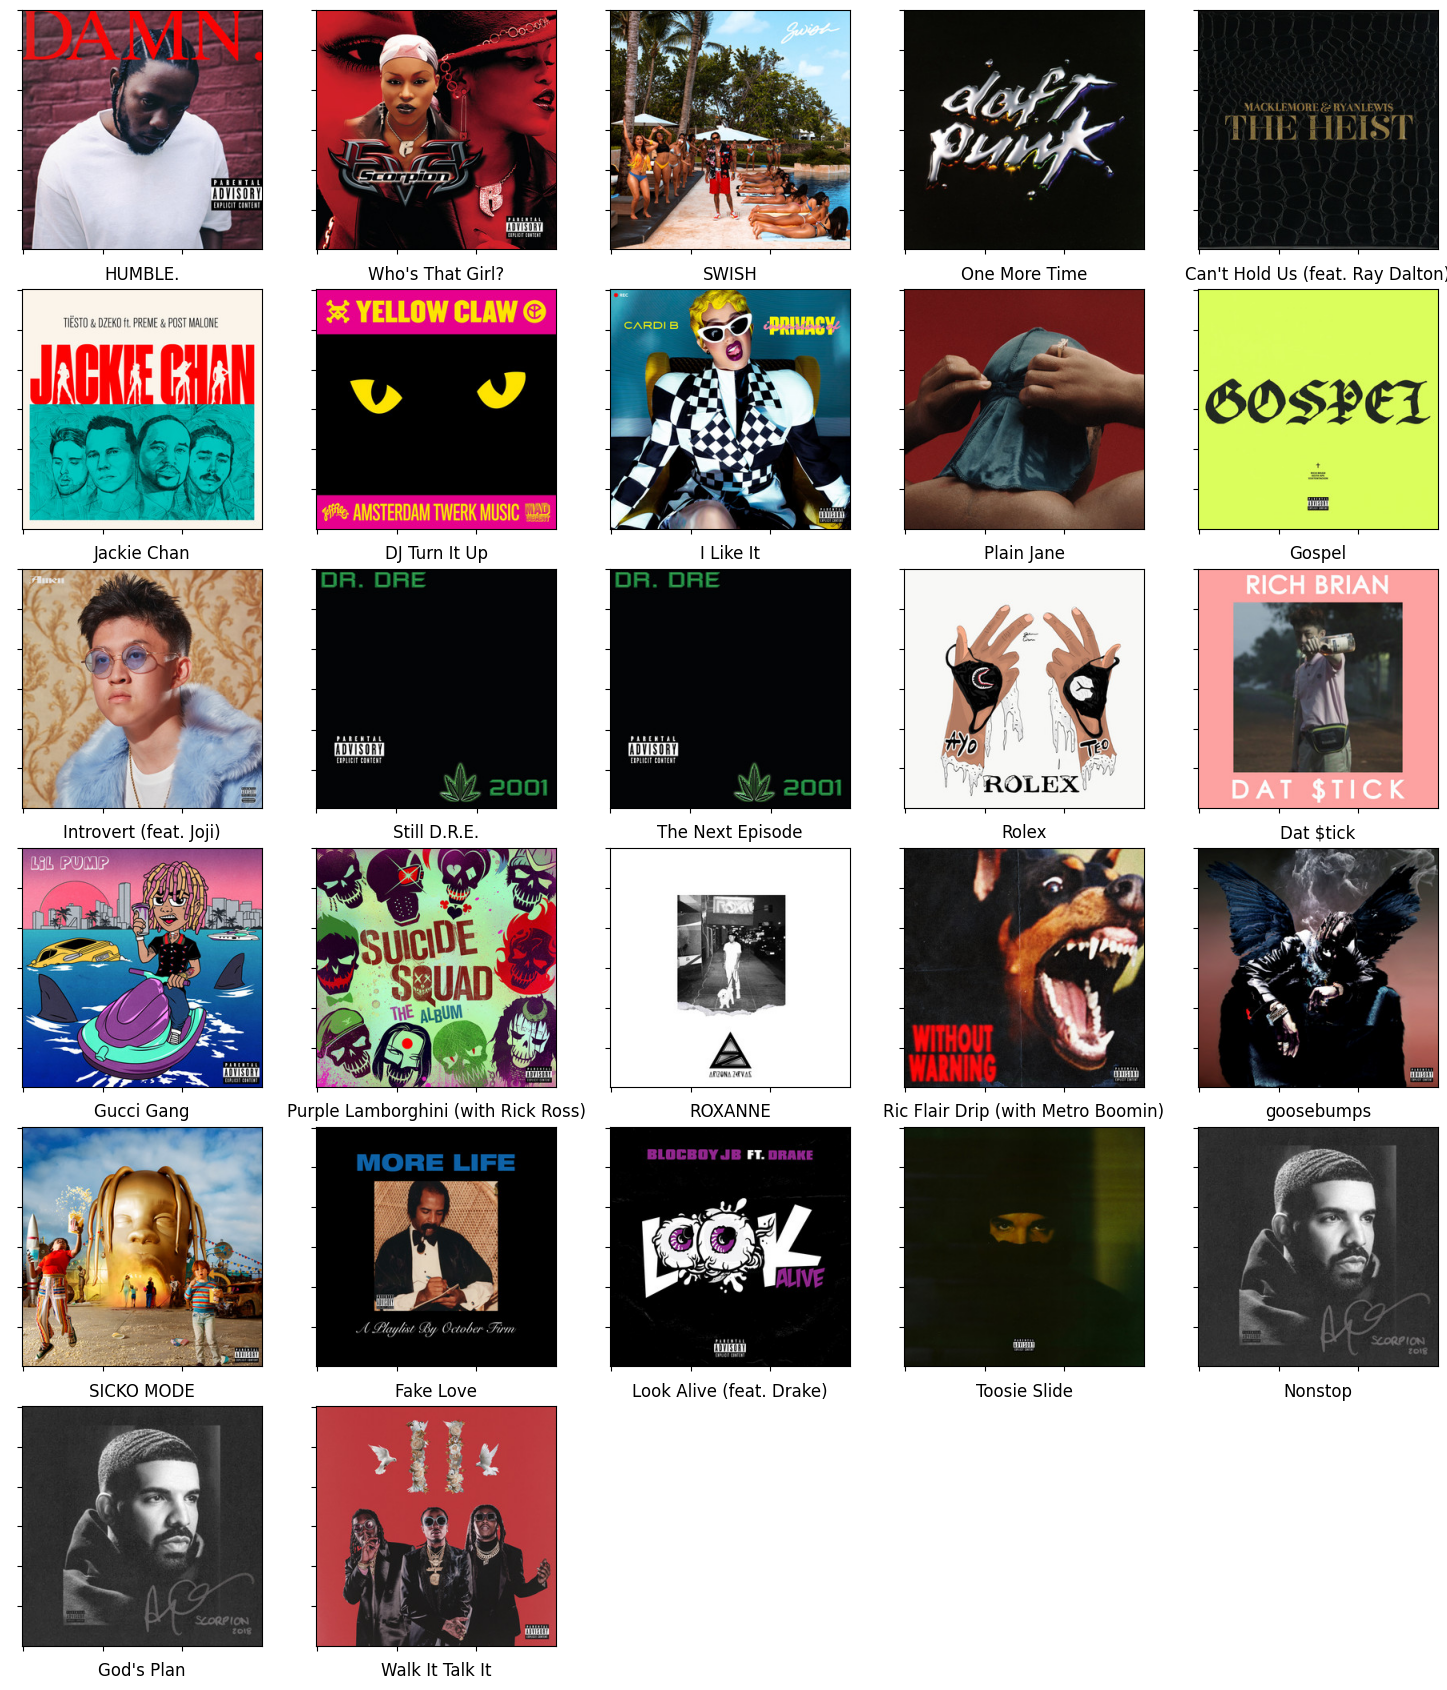

In [53]:
visualize_songs(playlist_hiphop)

In [54]:
def generate_playlist_feature(complete_feature_set, playlist_df, weight_factor):
    """ 
    Summarize a user's playlist into a single vector

    Parameters: 
        complete_feature_set (pandas dataframe): Dataframe which includes all of the features for the spotify songs
        playlist_df (pandas dataframe): playlist dataframe
        weight_factor (float): float value that represents the recency bias. The larger the recency bias, the most priority recent songs get. Value should be close to 1. 
        
    Returns: 
        playlist_feature_set_weighted_final (pandas series): single feature that summarizes the playlist
        complete_feature_set_nonplaylist (pandas dataframe): 
    """
    
    complete_feature_set_playlist = complete_feature_set[complete_feature_set['id'].isin(playlist_df['id'].values)]#.drop('id', axis = 1).mean(axis =0)
    complete_feature_set_playlist = complete_feature_set_playlist.merge(playlist_df[['id','date_added']], on = 'id', how = 'inner')
    complete_feature_set_nonplaylist = complete_feature_set[~complete_feature_set['id'].isin(playlist_df['id'].values)]#.drop('id', axis = 1)
    
    playlist_feature_set = complete_feature_set_playlist.sort_values('date_added',ascending=False)

    most_recent_date = playlist_feature_set.iloc[0,-1]
    
    for ix, row in playlist_feature_set.iterrows():
        playlist_feature_set.loc[ix,'months_from_recent'] = int((most_recent_date.to_pydatetime() - row.iloc[-1].to_pydatetime()).days / 30)
        
    playlist_feature_set['weight'] = playlist_feature_set['months_from_recent'].apply(lambda x: weight_factor ** (-x))
    
    playlist_feature_set_weighted = playlist_feature_set.copy()
    #print(playlist_feature_set_weighted.iloc[:,:-4].columns)
    playlist_feature_set_weighted.update(playlist_feature_set_weighted.iloc[:,:-4].mul(playlist_feature_set_weighted.weight,0))
    playlist_feature_set_weighted_final = playlist_feature_set_weighted.iloc[:, :-4]
    #playlist_feature_set_weighted_final['id'] = playlist_feature_set['id']
    
    return playlist_feature_set_weighted_final.sum(axis = 0), complete_feature_set_nonplaylist

In [55]:
complete_feature_set_playlist_vector_hiphop, complete_feature_set_nonplaylist_hiphop = generate_playlist_feature(complete_feature_set, playlist_hiphop, 1.09)

In [56]:
complete_feature_set_playlist_vector_hiphop.shape

(2758,)

In [57]:
def generate_playlist_recos(df, features, nonplaylist_features):
    """ 
    Pull songs from a specific playlist.

    Parameters: 
        df (pandas dataframe): spotify dataframe
        features (pandas series): summarized playlist feature
        nonplaylist_features (pandas dataframe): feature set of songs that are not in the selected playlist
        
    Returns: 
        non_playlist_df_top_40: Top 40 recommendations for that playlist
    """
    
    non_playlist_df = df[df['id'].isin(nonplaylist_features['id'].values)]
    non_playlist_df['sim'] = cosine_similarity(nonplaylist_features.drop('id', axis = 1).values, features.values.reshape(1, -1))[:,0]
    non_playlist_df_top_40 = non_playlist_df.sort_values('sim',ascending = False).head(40)
    non_playlist_df_top_40['url'] = non_playlist_df_top_40['id'].apply(lambda x: sp.track(x)['album']['images'][1]['url'])
    
    return non_playlist_df_top_40

In [58]:
hiphop_top40 = generate_playlist_recos(spotify_df, complete_feature_set_playlist_vector_hiphop, complete_feature_set_nonplaylist_hiphop)

In [59]:
hiphop_top40

acousticness                                       artists  \
58037        0.22300                                        ['NF']   
67473        0.21500                         ['Machine Gun Kelly']   
58061        0.12300                                        ['NF']   
58045        0.31200                                        ['NF']   
58029        0.16500                                        ['NF']   
58065        0.40400                                        ['NF']   
62497        0.73300              ['Metro Boomin', 'Travis Scott']   
107850       0.02150                   ['French Montana', 'Drake']   
58048        0.23300                                        ['NF']   
67478        0.02940                         ['Machine Gun Kelly']   
58071        0.48900                                        ['NF']   
58039        0.27200                                        ['NF']   
107847       0.02930                ['French Montana', 'Swae Lee']   
58044        0.16100                                        ['NF']   
58025        0.43400                                        ['NF']   
62500        0.19100  ['Metro Boomin', 'Swae Lee', 'Travis Scott']   
58053        0.65900                                        ['NF']   
58050        0.74900                                        ['NF']   
134946       0.15400                                   ['Cardi B']   
58009        0.20900                                        ['NF']   
61767        0.00263                                     ['Migos']   
58064        0.35400                                        ['NF']   
63507        0.25900                        ['Meek Mill', 'Drake']   
136769       0.15700                             ['Bryson Tiller']   
61786        0.04130                        ['Migos', '21 Savage']   
62499        0.07090           ['Metro Boomin', 'Offset', 'Drake']   
134939       0.10700                                   ['Cardi B']   
48304        0.02680            ['Playboi Carti', 'Bryson Tiller']   
134945       0.06590                                   ['Cardi B']   
120916       0.08910                                     ['Drake']   
67476        0.19700                         ['Machine Gun Kelly']   
55306        0.00369                             ['Nipsey Hussle']   
120943       0.27900                                     ['Drake']   
67469        0.00265                         ['Machine Gun Kelly']   
134944       0.05110                          ['Cardi B', 'Migos']   
134940       0.00534                                   ['Cardi B']   
136759       0.00304                             ['Bryson Tiller']   
134948       0.02560                                   ['Cardi B']   
120940       0.05890                                     ['Drake']   
120991       0.12800                                     ['Drake']   

        danceability  duration_ms  energy  explicit                      id  \
58037          0.718       183827   0.795         0  7hdw5gAGMyyn9z0XgfTv1j   
67473          0.896       281587   0.834         1  43TP6JCWXgkc2D7Xjz5hBr   
58061          0.735       181867   0.655         0  0MvqSYPr5Wi62JB7VWvqwz   
58045          0.662       212120   0.714         0  52okn5MNA47tk87PeZJLEL   
58029          0.739       325720   0.751         0  0we7ShV1o6cPTFjxOADPbC   
58065          0.797       239480   0.715         0  5n4ZzdO7KtpxsDpoDTa3D6   
62497          0.638       166093   0.400         1  6LyAwkJsHlW7RQ8S1cYAtM   
107850         0.765       192172   0.704         1  04MLEeAMuV9IlHEsD8vF6A   
58048          0.693       238667   0.717         0  3MFyER5LVCQNaUtipifGD7   
67478          0.839       157093   0.638         1  4jaH6whRB6Zgy5EzvKN5ZL   
58071          0.736       218200   0.727         0  1CDPxTsKRhI0wWel01w4Vy   
58039          0.719       215600   0.569         0  1kO0nC4VnEjMBeJZI7g2T2   
107847         0.726       233902   0.769         1  3B54sVLJ402zGa6Xm4YGNe   
58044          0.513       2092

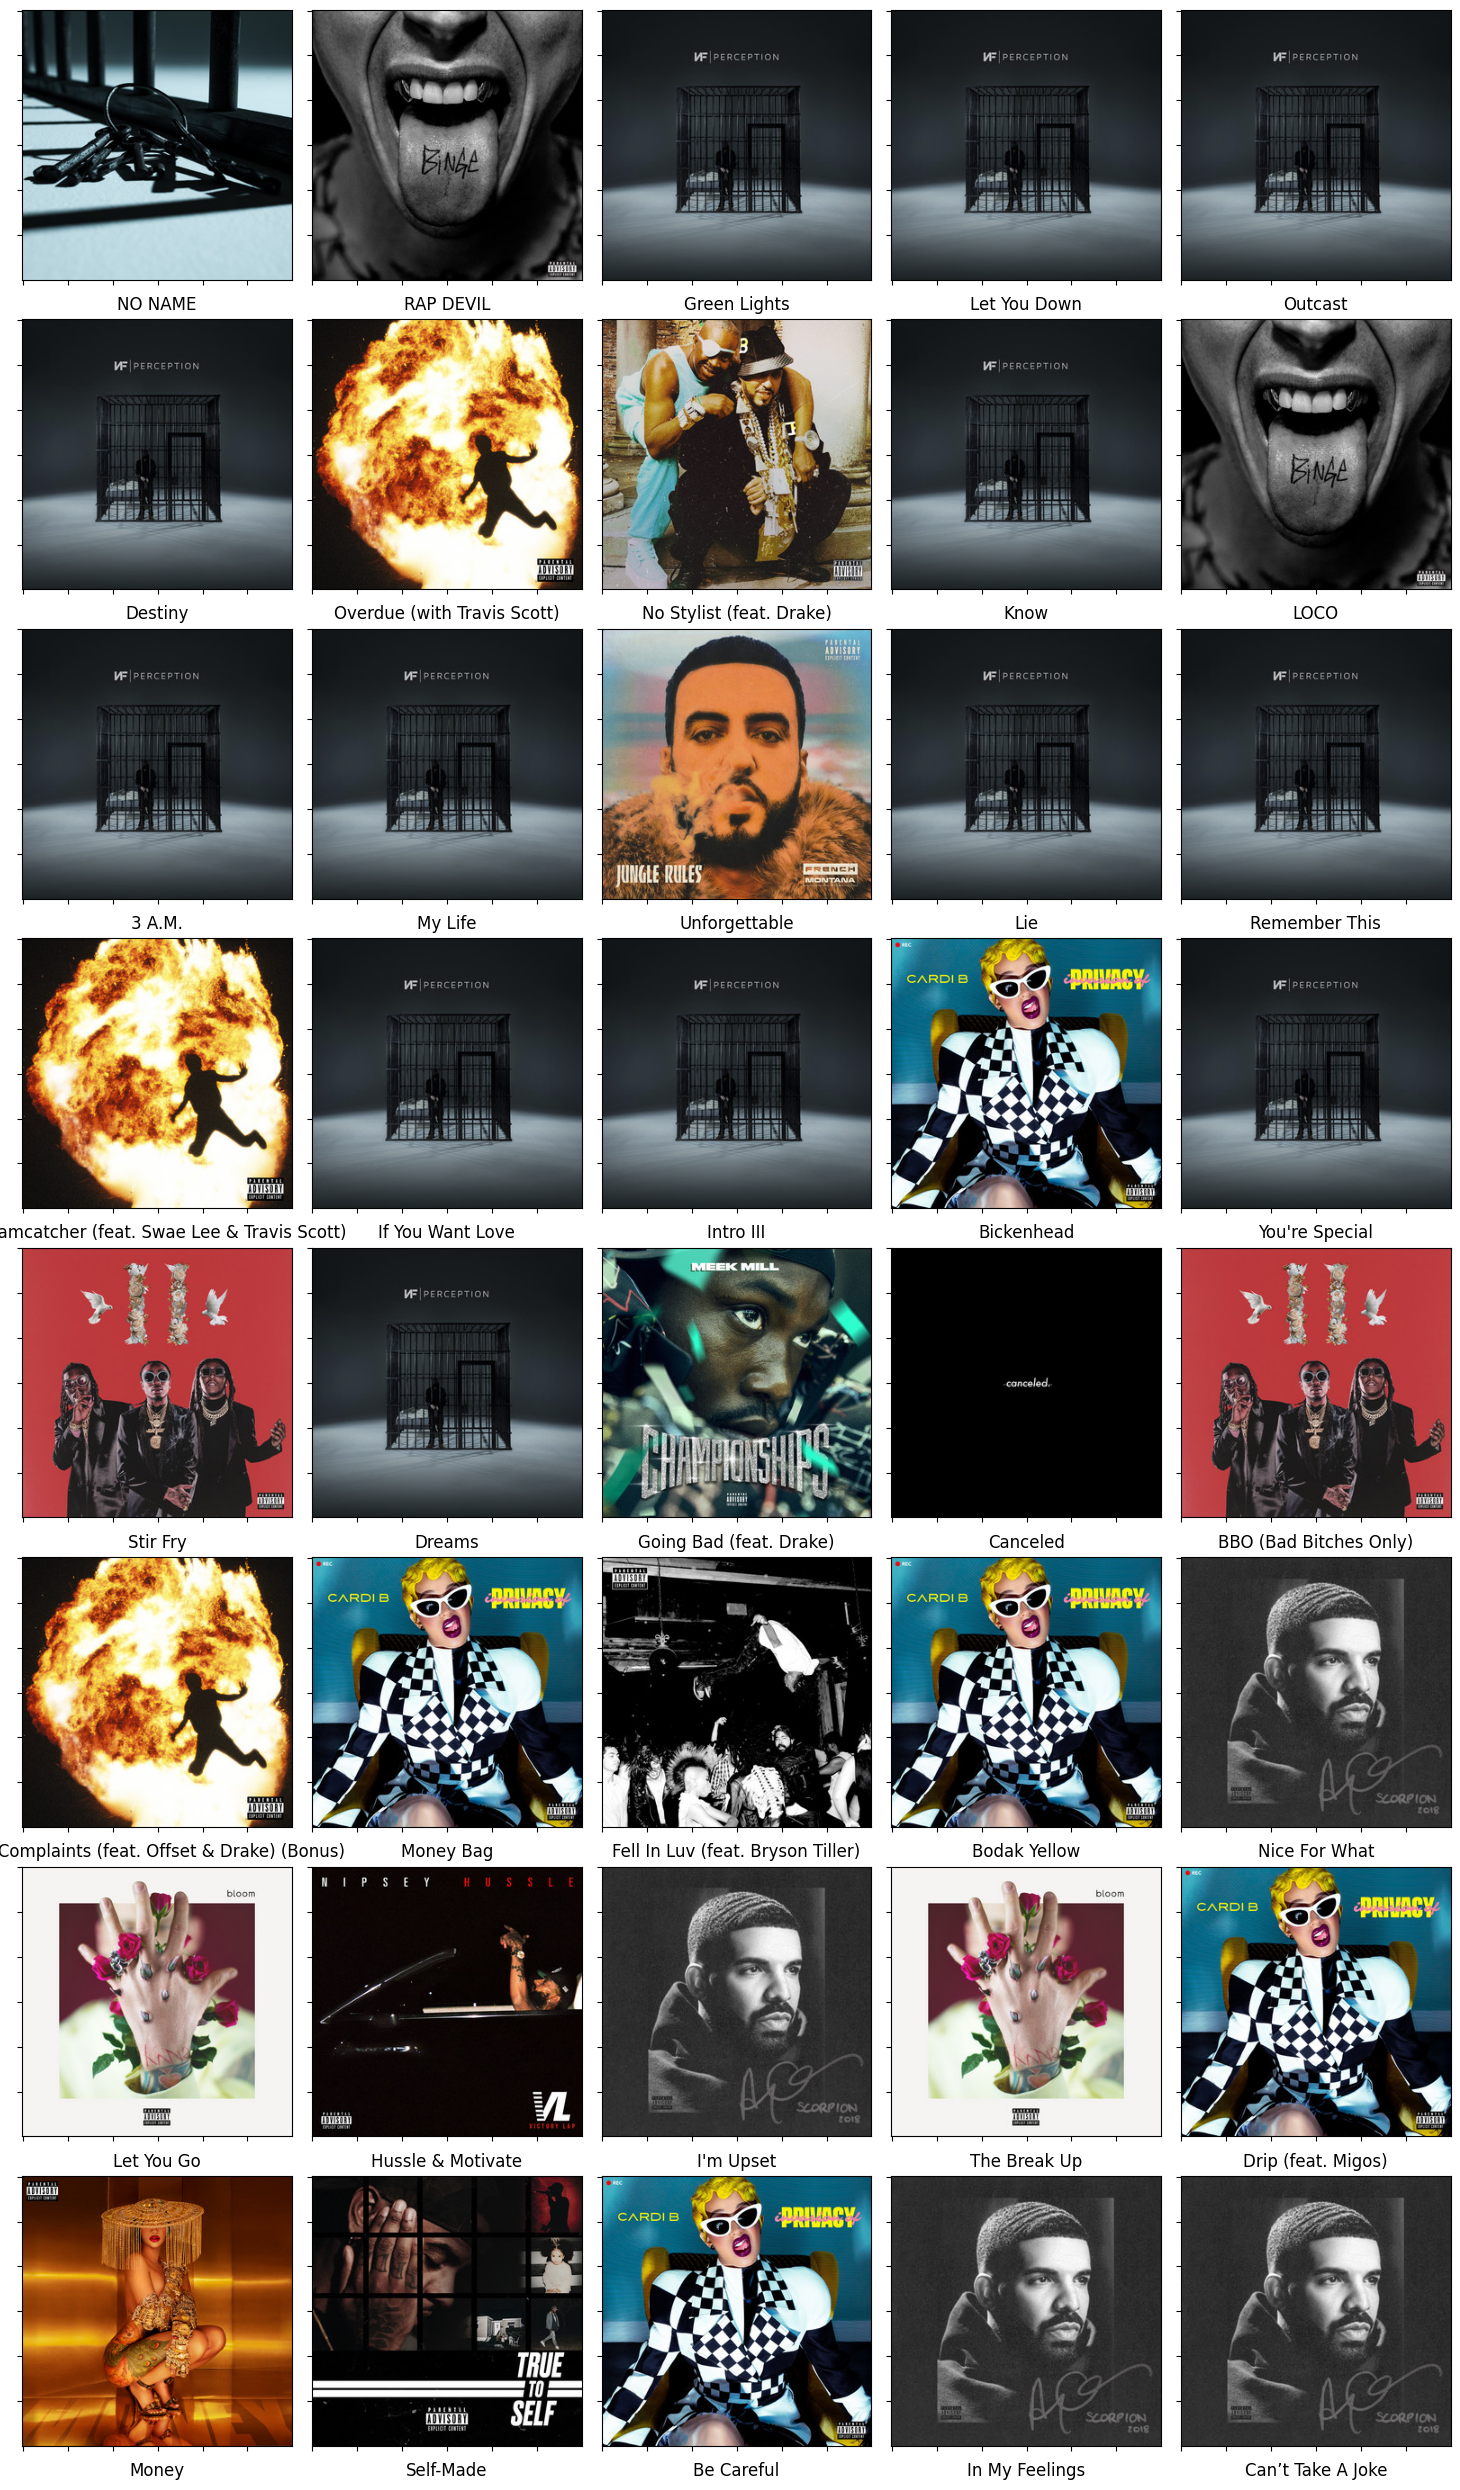

In [60]:
visualize_songs(hiphop_top40)

In [61]:

# Definisikan playlist yang sebenarnya (ground truth)
ground_truth_playlist = playlist_hiphop['id'].tolist() # Gantilah dengan daftar ID lagu yang benar-benar ada dalam playlist yang sebenarnya

# Ambil daftar ID lagu dari rekomendasi teratas
recommended_tracks = hiphop_top40['id'].tolist()

# Tentukan nilai K (misalnya, K=5)
k = 5

# Ambil K lagu pertama dari rekomendasi teratas
top_k_recommended = recommended_tracks[:k]

# Hitung berapa banyak lagu dalam ground truth yang muncul dalam top K rekomendasi
correct_predictions = len(set(ground_truth_playlist) & set(top_k_recommended))

# Hitung TOP K Accuracy
top_k_accuracy = correct_predictions / k

print(f"TOP {k} Accuracy: {top_k_accuracy:.2f}")

TOP 5 Accuracy: 0.00
